In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from custom import weather

# matplotlib.rcParams['font.family'] = ['Heiti TC']

def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)
def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

%load_ext autoreload
%autoreload 2

## Get all station codes (所有測站代碼）

In [2]:
# url = "https://e-service.cwb.gov.tw/wdps/obs/state.htm"
# df = pd.read_html(url)
# df = pd.DataFrame(df[0])
# df.columns = ['stn_code', 'stn_name', 'altitude', 'Longitude', 'Latitude', 'city', 'address', 'data_start_date', 'stn_end_date', 'comment', 'orig_stn_code', 'new_stn_code']
#df.to_csv('all_station_20201126.csv', index=False)

In [3]:
# datastart = '2015/1/1'
# dataend = '2020/11/26'

# df['data_start_date2'] = df.data_start_date.map(lambda x: max(pd.to_datetime(x), datetime.strptime(datastart, "%Y/%m/%d")))

# df['data_duration'] = 12 * (datetime.strptime(dataend, "%Y/%m/%d").year - df.data_start_date2.dt.year)+\
#                     (datetime.strptime(dataend, "%Y/%m/%d").month - df.data_start_date2.dt.month)

# df['data_duration2'] = df.data_duration.map(lambda x: f'{x//12}年{x%12}個月')
# df['data_period'] = df.data_start_date.map(lambda x: f'{x}-2020/11/26')

### load from saved dataframe

In [4]:
df = pd.read_csv('all_station_20201126.csv')
df

,stn_code,stn_name,altitude,Longitude,Latitude,city,address,data_start_date,stn_end_date,comment,orig_stn_code,new_stn_code,data_start_date2,data_duration,data_duration2,data_period
0,466850,五分山雷達站,756.0,121.781205,25.071182,新北市,瑞芳區靜安路四段1巷1號,1998/07/01,NaN,本站只有雷達觀測資料。,NaN,NaN,2015-01-01,70,5年10個月,1998/07/01-2020/11/26
1,466880,板橋,9.7,121.442017,24.997647,新北市,板橋區大觀路二段265巷62號,1972/03/01,NaN,原為探空站，自2002年開始進行氣象觀測。因受附近興建合宜住宅影響，日照觀測自民國104年起...,NaN,NaN,2015-01-01,70,5年10個月,1972/03/01-2020/11/26
2,466900,淡水,19.0,121.448906,25.164889,新北市,淡水區中正東路42巷6號,1942/01/01,NaN,NaN,NaN,NaN,2015-01-01,70,5年10個月,1942/01/01-2020/11/26
3,466910,鞍部,837.6,121.529731,25.182586,臺北市,北投區陽明山竹子湖路111號,1937/01/01,NaN,NaN,NaN,NaN,2015-01-01,70,5年10個月,1937/01/01-2020/11/26
4,466920,臺北,5.3,121.514853,25.037658,臺北市,中正區公園路64號,1896/01/01,NaN,2014至2015氣候年報之氣壓計海面上高度應為30.3m(2014/10/25搬遷，6.6...,NaN,NaN,2015-01-01,70,5年10個月,1896/01/01-2020/11/26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,C1Z110,三棧,680.0,121.605010,24.115570,花蓮縣,秀林鄉雙露山,2017/12/01,NaN,原(C1Z090)站因移位，於2017/12/1變更為(C1Z110)站。,C1Z090,NaN,2017-12-01,35,2年11個月,2017/12/01-2020/11/26
604,C1Z120,壽豐,62.0,121.508081,23.870853,花蓮縣,壽豐鄉壽豐村壽山路37號(壽豐鄉文康中心),2017/06/03,NaN,原(C1T890)站因移位，於2017/6/3變更為(C1Z120)站。,C1T890,NaN,2017-06-03,41,3年5個月,2017/06/03-2020/11/26
605,C1Z130,銅門,187.0,121.492842,23.965694,花蓮縣,秀林鄉銅門村69號(銅門國小),2017/06/03,NaN,原(C1T860)站因移位，於2017/6/3變更為(C1Z130)站。,C1T860,NaN,2017-06-03,41,3年5個月,2017/06/03-2020/11/26
606,C1Z140,荖溪,950.0,121.459640,23.890575,花蓮縣,秀林鄉,2018/03/23,NaN,NaN,NaN,NaN,2018-03-23,32,2年8個月,2018/03/23-2020/11/26


In [5]:
## station with data less than 1 year
new_stn = df[df.data_duration<12]
new_stn.shape

(22, 16)

## Show the location of weather station on map

In [6]:
## upgrade to the latest commit of brance and folium to fix unicode character display problem
# !pip install git+https://github.com/python-visualization/branca.git@master

In [7]:
# !pip install git+https://github.com/python-visualization/folium.git@master

In [8]:
# !pip install --force-reinstall branca folium

In [9]:
import branca

branca.__version__

'0.4.1+4.gac45f1e'

In [10]:
import folium

folium.__version__

'unknown'

In [12]:
### show all weather station. Not run 
# map_weather = map_with_marker(lat=df['Latitude'], lng=df['Longitude'], label1=df['stn_name'], 
#                               label2=df['city'], color=df['city'].astype('category').cat.codes, 
#                               cmap='tab10', location='Taiwan', zoom=8)
# map_weather

## Load cleaned weather data

In [11]:
df_w = pd.read_pickle('weather_all_cleaned.bz2')

## make wind dir bins

In [78]:
#direction 0 means no wind, not direction, north is 360
df_w['WD'].replace({0: np.nan}, inplace=True)

In [79]:
df_w['WD'].min()

1.0

In [90]:
bin10_edge = np.linspace(0, 360, 37)
bin10_label = list(range(5,360,10))
df_w['WD_bin10'] = pd.cut(df_w.WD, bins=bin10_edge, labels=bin10_label)
df_w

StnPres  StnPresMax  StnPresMin  Temperature  T Max  \
stn_code date                                                              
466880   2015-01-01   1026.7      1028.9      1023.6         13.8   16.1   
         2015-01-02   1025.1      1027.0      1022.3         14.3   17.8   
         2015-01-03   1020.7      1024.6      1018.2         16.2   21.4   
         2015-01-04   1016.4      1018.3      1014.3         15.9   23.4   
         2015-01-05   1014.1      1016.4      1012.7         16.7   24.4   
...                      ...         ...         ...          ...    ...   
C0Z330   2020-11-22    966.1       968.3       964.3         22.6   30.6   
         2020-11-23    968.6       970.0       967.4         19.7   22.1   
         2020-11-24    968.3       969.9       966.7         19.1   21.0   
         2020-11-25    967.7       969.1       965.6         19.8   25.9   
         2020-11-26    967.9       969.6       965.7         20.1   25.1   

                     T Min    RH  RHMin   WS     WD  WSGust  WDGust  Precp  \
stn_code date                                                                
466880   2015-01-01   12.2  56.0   46.0  3.8   70.0    13.4    80.0    0.0   
         2015-01-02   11.9  57.0   48.0  3.5   70.0    14.3    70.0    0.0   
         2015-01-03   12.9  60.0   44.0  2.0   60.0     8.3    80.0    0.0   
         2015-01-04   11.1  76.0   44.0  0.6  200.0     4.6    40.0    0.0   
         2015-01-05   12.1  81.0   51.0  0.5  200.0     3.2   210.0    0.0   
...                    ...   ...    ...  ...    ...     ...     ...    ...   
C0Z330   2020-11-22   19.2  91.0   59.0  0.4   24.0     3.2    99.0    0.0   
         2020-11-23   18.9  99.0   89.0  1.4  352.0     8.4   345.0   13.5   
         2020-11-24   18.4  99.0   99.0  1.0  351.0     6.8     5.0   36.5   
         2020-11-25   17.4  94.0   69.0  0.6    4.0     5.9     1.0    1.5   
         2020-11-26   17.6  92.0   67.0  0.7   25.0     5.3   350.0    0.0   

                     PresDif  TempDif  RHDif WD_bin10  
stn_code date                                          
466880   2015-01-01      5.3      3.9   10.0       65  
         2015-01-02      4.7      5.9    9.0       65  
         2015-01-03      6.4      8.5   16.0       55  
         2015-01-04      4.0     12.3   32.0      195  
         2015-01-05      3.7     12.3   30.0      195  
...                      ...      ...    ...      ...  
C0Z330   2020-11-22      4.0     11.4   32.0       25  
         2020-11-23      2.6      3.2   10.0      355  
         2020-11-24      3.2      2.6    0.0      355  
         2020-11-25      3.5      8.5   25.0        5  
         2020-11-26      3.9      7.5   25.0       25  

[826266 rows x 17 columns]

In [92]:
# move index for easier grouping
df_w.reset_index(inplace=True)
df_w['month'] = df_w.date.dt.month
df_w['year'] = df_w.date.dt.year

In [96]:
# calculate maximum WS in each WD(bin10) groupby month, station
df_w['WSperWD10'] = df_w.groupby(['stn_code', 'month', 'WD_bin10']).WS.transform('median')

In [100]:
cmax(50)
rmax(50)
df_w

,stn_code,date,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PresDif,TempDif,RHDif,WD_bin10,month,year,WSperWD10
0,466880,2015-01-01,1026.7,1028.9,1023.6,13.8,16.1,12.2,56.0,46.0,3.8,70.0,13.4,80.0,0.0,5.3,3.9,10.0,65,1,2015,2.75
1,466880,2015-01-02,1025.1,1027.0,1022.3,14.3,17.8,11.9,57.0,48.0,3.5,70.0,14.3,70.0,0.0,4.7,5.9,9.0,65,1,2015,2.75
2,466880,2015-01-03,1020.7,1024.6,1018.2,16.2,21.4,12.9,60.0,44.0,2.0,60.0,8.3,80.0,0.0,6.4,8.5,16.0,55,1,2015,2.50
3,466880,2015-01-04,1016.4,1018.3,1014.3,15.9,23.4,11.1,76.0,44.0,0.6,200.0,4.6,40.0,0.0,4.0,12.3,32.0,195,1,2015,1.00
4,466880,2015-01-05,1014.1,1016.4,1012.7,16.7,24.4,12.1,81.0,51.0,0.5,200.0,3.2,210.0,0.0,3.7,12.3,30.0,195,1,2015,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826261,C0Z330,2020-11-22,966.1,968.3,964.3,22.6,30.6,19.2,91.0,59.0,0.4,24.0,3.2,99.0,0.0,4.0,11.4,32.0,25,11,2020,0.90
826262,C0Z330,2020-11-23,968.6,970.0,967.4,19.7,22.1,18.9,99.0,89.0,1.4,352.0,8.4,345.0,13.5,2.6,3.2,10.0,355,11,2020,1.50
826263,C0Z330,2020-11-24,968.3,969.9,966.7,19.1,21.0,18.4,99.0,99.0,1.0,351.0,6.8,5.0,36.5,3.2,2.6,0.0,355,11,2020,1.50
826264,C0Z330,2020-11-25,967.7,969.1,965.6,19.8,25.9,17.4,94.0,69.0,0.6,4.0,5.9,1.0,1.5,3.5,8.5,25.0,5,11,2020,0.70


In [129]:
temp = df_w[(df_w.stn_code=='466950') & (df_w.month==2)]

In [206]:
def plot_wind_color(df_temp, col_bin, col_ws, ws_max=None, G_dir=None, G_speed=None, cmap='jet', ax=None):
    '''rose plot for wind direciton.
    Polar histogram height(size) stands for occurance(count) in that direction.
    Color of the bar stands for median wind speed in that direction.
    '''

    radii = df_temp[col_bin].value_counts(sort=False)
    ws = df_temp.groupby([col_bin])[col_ws].median().fillna(0)
    # create cmap
    cmap = matplotlib.cm.get_cmap(cmap)
    #scale ws to [0,1], use either given global max, or local max
    if ws_max is None:
        ws_max = ws.max()
    ws_scaled = (ws-ws.min())/(ws_max-ws.min())
    
    #get corresponding colors
    colors = [cmap(w) for w in ws_scaled]
    #bar width
    width = (2*np.pi) / 36
    #polar coord of the bar (starting angles in radian)
    theta = np.linspace(0.0, 2 * np.pi, 36, endpoint=True)
    radi_max = radii.max()
    
    if ax is None:
        ax = plt.subplot(111,polar=True)

    bars = ax.bar(theta, radii, width=width, bottom=0, align='edge',
                  edgecolor = 'gray', linewidth=0, color=colors)
    
    if (G_dir is not None) & (G_speed is not None):
        ax.quiver(0,0,np.radians(G_dir),radi_max, color='r', angles="xy", 
              units="y", scale=1, scale_units='xy',headwidth=5,
              zorder=10)
        ax.text(1.0, 1.0, f'max gust:\n{G_speed}m/s',
            ha='right', va='top',color='r',
            transform=ax.transAxes)
    
    # set starting from 12o'clock and clockwise
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    # hide grid, spine and yticks
    ax.grid(alpha=0.3)
    ax.spines['polar'].set_visible(False)
    ax.set_yticks([])
    # set the angle label
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)
#     ax.set_xticks([0,np.pi/2,np.pi,np.pi*3/2])
    ax.set_xticklabels(['N','', 'E','', 'S','', 'W',''])

#     plt.show()
    return bars

<BarContainer object of 36 artists>

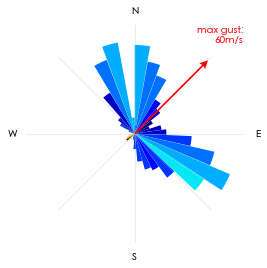

In [207]:
plot_wind_color(temp, 'WD_bin10', 'WS', G_dir=45, G_speed=60)

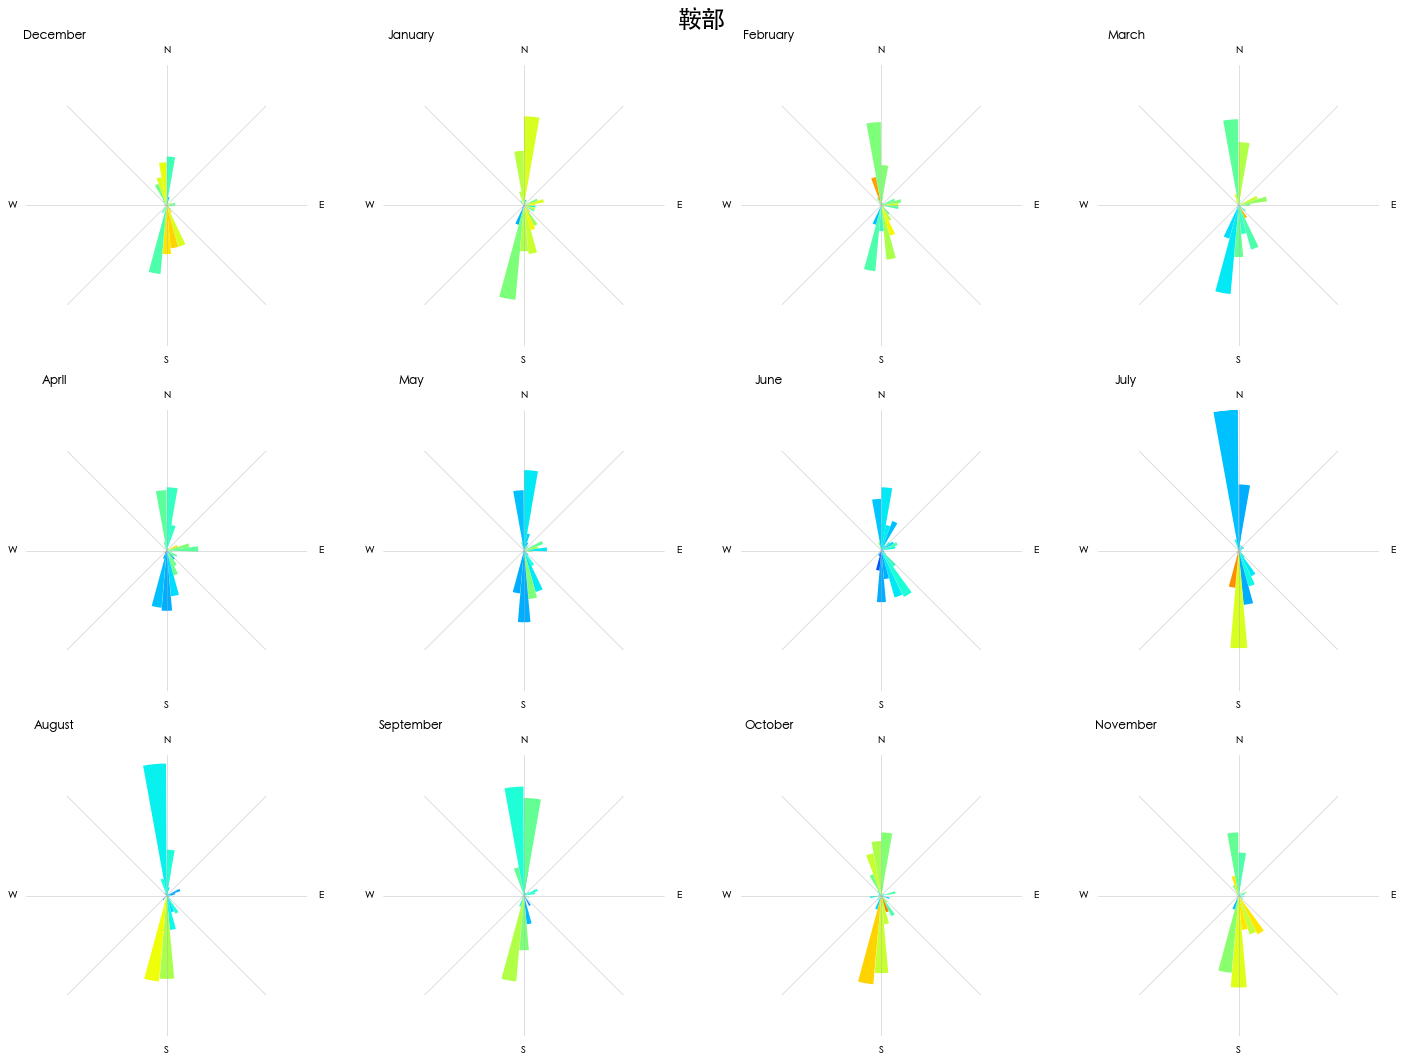

In [178]:
code = '466910'
temp = df_w.loc[df_w.stn_code==code]
stn_name = df[df.iloc[:,0]==code].iloc[0,1]

fig, axes = plt.subplots(figsize=(20,15), ncols=4, nrows=3, subplot_kw=dict(polar=True))
fig.suptitle(stn_name, fontsize=24)

wdcount_max = temp.groupby(['month','WD_bin10']).date.count().max()
ws_max = temp.groupby(['month','WD_bin10']).WS.median().max()
for m, ax in zip(np.r_[12, 1:12], axes.flat):
    temp_m = temp[temp.month==m]
    plot_wind_color(temp_m, 'WD_bin10', 'WS', ws_max=ws_max, cmap='GnBu', ax=ax)
    
    monthname = datetime.strptime(str(m), "%m").strftime("%B")
    ax.set_ylim(0,wdcount_max)
    ax.set_title(monthname, x=0.1)
    

plt.tight_layout()

In [166]:
temp

,stn_code,date,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PresDif,TempDif,RHDif,WD_bin10,month,year,WSperWD10
4311,466910,2015-01-01,930.6,932.7,929.1,5.7,8.4,3.3,84.0,72.0,2.4,320.0,15.2,310.0,0.0,3.6,5.1,12.0,315,1,2015,2.25
4312,466910,2015-01-02,929.9,931.5,928.0,6.5,10.0,4.5,84.0,71.0,3.3,190.0,15.4,180.0,0.0,3.5,5.5,13.0,185,1,2015,2.70
4313,466910,2015-01-03,926.9,929.5,925.1,9.3,14.5,5.8,84.0,69.0,2.5,200.0,10.7,110.0,0.0,4.4,8.7,15.0,195,1,2015,1.60
4314,466910,2015-01-04,923.6,925.2,922.3,12.7,18.0,8.5,79.0,61.0,1.0,210.0,6.0,200.0,0.0,2.9,9.5,18.0,205,1,2015,1.00
4315,466910,2015-01-05,922.4,924.2,921.5,14.5,19.7,10.6,74.0,57.0,0.8,190.0,5.8,360.0,0.0,2.7,9.1,17.0,185,1,2015,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,466910,2020-11-22,925.8,928.9,923.4,19.1,23.7,15.4,93.0,68.0,2.0,360.0,17.2,360.0,8.0,5.5,8.3,25.0,355,11,2020,2.40
6464,466910,2020-11-23,927.8,930.0,926.1,15.9,16.7,15.4,99.0,97.0,3.9,180.0,17.2,160.0,36.5,3.9,1.3,2.0,175,11,2020,3.35
6465,466910,2020-11-24,927.4,929.3,926.0,15.8,16.3,15.3,99.0,97.0,4.2,170.0,17.5,180.0,6.5,3.3,1.0,2.0,165,11,2020,3.60
6466,466910,2020-11-25,926.3,927.6,924.6,17.2,18.1,15.7,98.0,94.0,3.5,180.0,15.0,220.0,2.0,3.0,2.4,4.0,175,11,2020,3.35


In [170]:
temp.groupby(['month','WD_bin10']).WS.median().max()

5.4

In [12]:
# only keep weather stations without too many missing data (as filtered in the cleaned dataset)
code_list = df_w.index.get_level_values(0).unique().values

df2 = df[df.stn_code.isin(code_list)]

### plot again filtered station on map

In [15]:
# map_weather = weather.map_with_marker(lat=df2['Latitude'], lng=df2['Longitude'], label1=df2['stn_name'], 
#                               label2=df2['city'], color=df2['city'].astype('category').cat.codes, 
#                               cmap='tab10', location='Taiwan', zoom=8)
# map_weather

## Plot wind directions

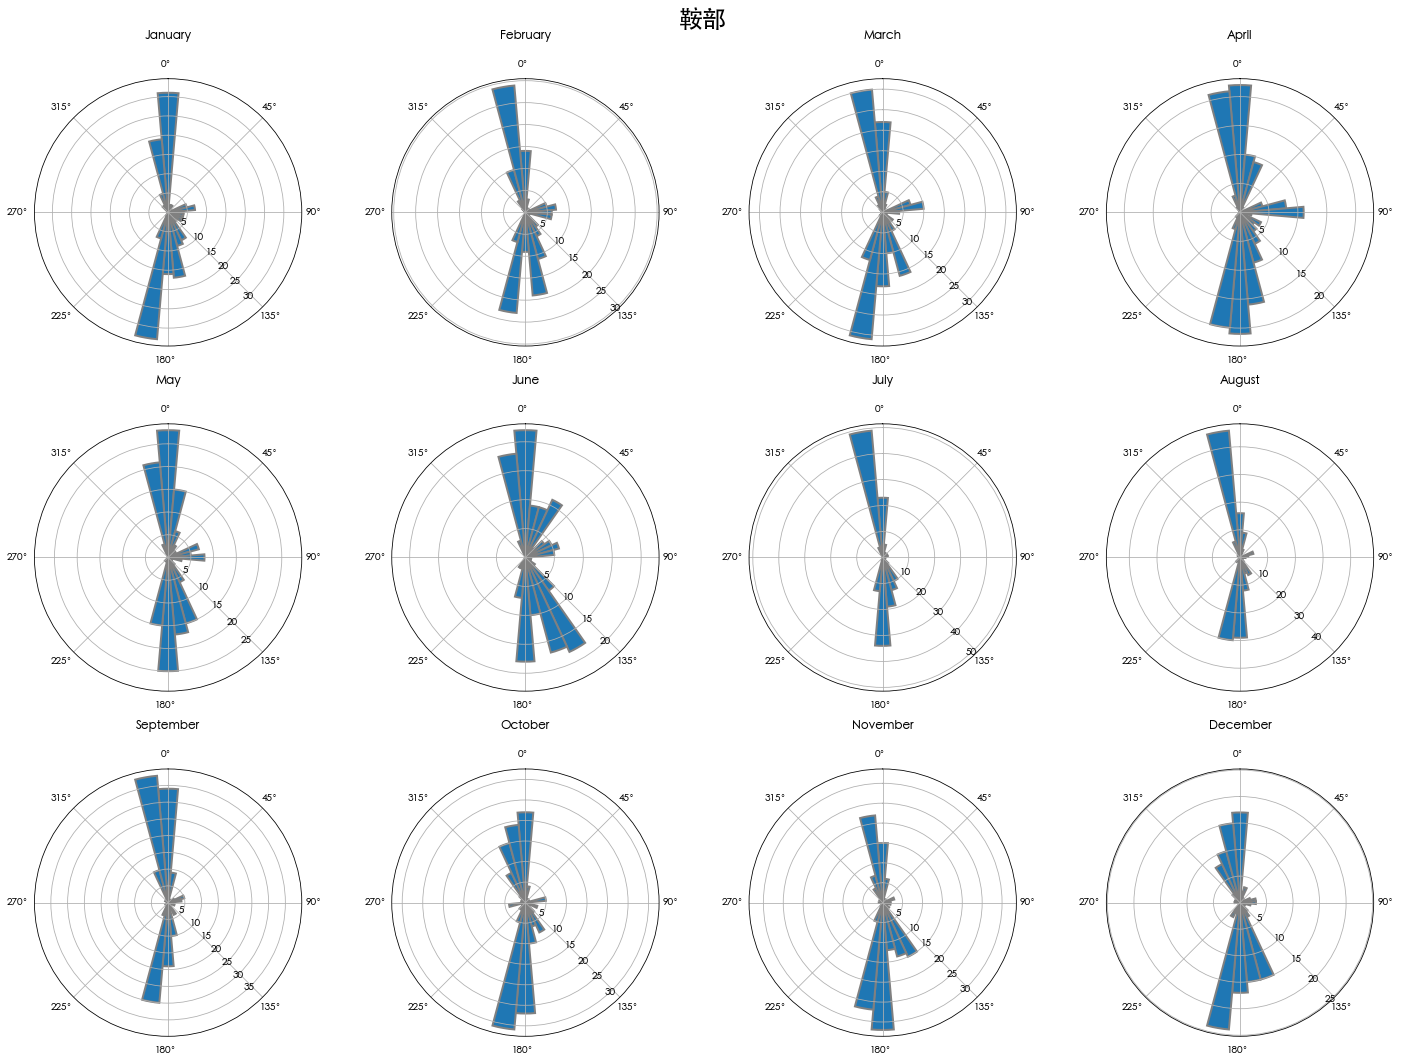

In [60]:
code = '466910'
temp = df_w.loc[code]
stn_name = df[df.iloc[:,0]==code].iloc[0,1]

temp['Month'] = temp.index.month_name().astype('category')

fig, axes = plt.subplots(figsize=(20,15), ncols=4, nrows=3, subplot_kw=dict(polar=True))
fig.suptitle(stn_name, fontsize=24)
for (i, m), ax in zip(enumerate(temp.Month.unique()), axes.flat):
    wind = temp[temp.Month==m].WD
    weather.plot_wind(wind, 10, ax=ax)
    ax.set_title(m, pad=20)

plt.tight_layout()

### plot and save wind directon plot for all stations

In [13]:
## filter out station with <1y data
codes_plot = list(set(df2.stn_code.unique()).difference(set(new_stn.stn_code.unique())))
len(codes_plot)

446

In [ ]:
### plot the average wind and wind gust

# for code in tqdm(codes_plot):

#     stn_name = df[df.iloc[:,0]==code].iloc[0,1]
#     print(f'plotting {stn_name}')
    
#     temp = df_w.loc[code]
#     temp['month'] = temp.index.month.astype('category')
#     temp['year'] = temp.index.year.astype('category')

#     fig, axes = plt.subplots(figsize=(12,15), ncols=3, nrows=4, subplot_kw=dict(polar=True))
# #     fig.suptitle(stn_name, fontsize=18, y=0.98)
#     bw=10
#     y_max=0
#     for m, ax in zip(np.r_[12,1:12], axes.flat):
#         temp_m = temp[temp.month==m]
#         wind = temp_m.WD
#         windG = temp_m.WDGust

#         ## Get the max wind gust speed and dir in full period (all years)
#         idx = temp_m.WSGust.idxmax()
#         G_max = temp_m.loc[idx, 'WSGust']
#         G_dir = temp_m.loc[idx, 'WDGust']
#     # #     counts, bins = np.histogram(temp_m.loc[idx.dropna()].WDGust, bins=(360//bw), range=[0,360])
#     #     ## 當月最大風速 "最常" 出現在那個方向. 
#     #     G_dir = bins[np.argmax(counts)]

#         radi_max = weather.plot_wind_gust(wind, windG, G_dir, G_max, bin_degree=10, ax=ax)
#         y_max = radi_max if (radi_max>y_max) else y_max
#         monthname = datetime.strptime(str(m), "%m").strftime("%B")
#         ax.set_title(monthname, x=0.1)
    
#     for ax in axes.flat:  ## set all subplot with the same maximum
#         ax.set_ylim(0,y_max)
        
#     plt.tight_layout()
#     plt.savefig(f'resources/{code}.png')
#     plt.close(fig)

In [ ]:
### plot the average wind with colorcoded ws(by WD)

for code in tqdm(codes_plot):

    stn_name = df[df.iloc[:,0]==code].iloc[0,1]
    print(f'plotting {stn_name}')

    temp = df_w.loc[df_w.stn_code==code]
    wdcount_max = temp.groupby(['month','WD_bin10']).date.count().max()
    ws_max = temp.groupby(['month','WD_bin10']).WS.median().max()
    
    fig, axes = plt.subplots(figsize=(12,15), ncols=3, nrows=4, subplot_kw=dict(polar=True))
    fig.suptitle(stn_name, fontsize=18, y=0.98)
    bw=10
    y_max=0
    for m, ax in zip(np.r_[12,1:12], axes.flat):
        temp_m = temp[temp.month==m]
        ## Get the max wind gust speed and dir in full period (all years)
        idx = temp_m.WSGust.idxmax()
        G_max = temp_m.loc[idx, 'WSGust']
        G_dir = temp_m.loc[idx, 'WDGust']
        
        plot_wind_color(temp_m, 'WD_bin10', 'WS', ws_max=ws_max,
                        G_dir=G_dir, G_speed=G_max, cmap='Wistia', ax=ax)
    
        ax.set_title(monthname, x=0.1)
        ax.set_ylim(0,wdcount_max)
        monthname = datetime.strptime(str(m), "%m").strftime("%B")
        ax.set_title(monthname, x=0.1)
    

    plt.tight_layout()
    plt.savefig(f'resources2/{code}.png')
    plt.close(fig)

## Plot map with wind stat image popup

In [217]:
from matplotlib import cm
import folium
import geocoder
import os
import base64


def map_with_windpopup(df, c_col, imagepath, cmap='Set1', location='Taiwan', zoom=9, jupyter=True):
    '''
    Create folium map with popup showing pre-generate images.
    Depending on whether the map need to be rendered in jupyter or in browser, 
    the way to embed image differs. In jupyter images need to be encoded in base64 
    string and save along the map html file. But for render in browser, the html
    link still works, and we don't need to embed images in html files but can be 
    loaded separately from img src="link".
    '''
    # create a color map
    ccode = df[c_col].astype('category').cat.codes
    cmap = cm.get_cmap(cmap, ccode.nunique())    # PiYG
    rgb = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
    
    # create the location map
    g = geocoder.osm(location)
    latitude = g.latlng[0]
    longitude = g.latlng[1]
    
    # create the main map
    f = folium.Figure(width=800, height=900)
    map_ = folium.Map(location=[latitude, longitude], zoom_start=zoom).add_to(f)    
    
    # add marker to map
    for c,(i,row) in zip(ccode, df.iterrows()):
        hovertext = f'{row.stn_name}, {row.city}, Alt {row.altitude}m'
        Filename =os.path.join(imagepath, f'{row.stn_code}.png')
        html = '<body style="background-color:#E9E9E9;">'
        html += f"<b>{row.stn_name}{row.stn_code}, 資料期間:{row.data_duration2}</b>"
        if os.path.isfile(Filename):
            if jupyter:
            ## embed the image as base64 string inside the html file
                encoded = base64.b64encode(open(Filename, 'rb').read())
                html+=f'<img src="data:image/png;base64,{encoded.decode("UTF-8")}" style="width:98%;height:98%;">'
                html=folium.IFrame(html, width=600, height=700)
#                 popup=folium.Popup(iframe, max_width='100%', autoPan=True, keepInView=True)
            else:
            # load the image in resources folder
                html += f'<img src="{Filename}" width="600" height="700">'
        else:
            print(f'file not exist:{Filename}')
            pass
        popup=folium.Popup(html, max_width='100%', keepInView=True)
        
        folium.CircleMarker(
            [row.Latitude, row.Longitude],
            radius=5,
            popup=popup,
            tooltip=hovertext,
            color=rgb[c],
            fill=True,
            fill_color=rgb[c],
            fill_opacity=0.9,
            parse_html=False).add_to(map_)
#         print(i, row.stn_name)
    
    return map_

In [218]:
map_weather = map_with_windpopup(df2, c_col='city', imagepath='resources', 
                                 cmap='tab10', location='Taiwan', zoom=8, jupyter=False)
map_weather

file not exist:resources/467270.png
file not exist:resources/C0E880.png
file not exist:resources/C0FA00.png
file not exist:resources/C0G910.png
file not exist:resources/C0M860.png
file not exist:resources/C0R710.png
file not exist:resources/C0R730.png
file not exist:resources/C0R740.png
file not exist:resources/C0R750.png
file not exist:resources/C0R760.png
file not exist:resources/C0R770.png
file not exist:resources/C0R780.png
file not exist:resources/C0R790.png
file not exist:resources/C0R800.png
file not exist:resources/C0R810.png
file not exist:resources/C0R820.png
file not exist:resources/C0R830.png
file not exist:resources/C0R840.png
file not exist:resources/C0SA60.png
file not exist:resources/C0SA90.png
file not exist:resources/C0X320.png


In [219]:
map_weather.save('index.html')

In [17]:
"C0R710" in codes_plot

False